<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/WatsonToneAnalyser_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a dataframe from analysed text data

This project includes the use the IBM Watson Tone Analyser API, sending text data to it, using security information stored in a config file to keep it secret, receiving the results in JSON format, investigating the structure of the results and building a dataframe from them.

Then using the results to create a visualisation of tone and to report an overall set of statistics from the data.

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for [IBM Watson](https://cloud.ibm.com/registration?cm_mmc=dw-_-cognitive-_-topcoder-_-communityEducational1)
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

# Step 2 - add security to your worksheet to keep your apikey and url hidden

You can do this by using environment variables, which are stored in the operating system for this worksheet.

We will use a simplified system for storing the sensitive data so that it isn't visible in the worksheet:

1.  Ask for the api key to be input and store it in an environment variable called apikey

2.  Ask for the url to be input and store it in an environment variable

3.  Run the cell, type in the api key, then the url.  Once tis has been done.  Remove the output part of the cell.

In [ ]:
import os

# add the code to ask for the URL, then run this cell and when it has completed, remove the output (note: you will need to do this again if you return to the worksheet)
os.environ['APIKEY'] = input("Enter API key: ")
os.environ['URL'] = input("Enter URL: ")


Enter API key: 
Enter URL: 


# Install the ibm_watson libraries so that you can use their functions

In [ ]:
# install the ibm_watson libraries

!pip install ibm_watson

---

## Test to make sure it works

1.  Open this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing.  You will be able to copy and paste the text into here as needed.

2.  Get the environment variable for each of the two pieces of security information so that these do not need to be included in your notebook (have the keys available for copying and pasting).  To do this:

  ``` apikey = os.environ.get('APIKEY') ```

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your environment variables, then paste the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the environment variables you set
def get_secret(key):
    # add code here to get the keys from the environment variable and return the requested key
    # if there is an error print an error message and return None
    return os.environ.get(key)
    
def get_text_for_analysis():
    # add code here to input the text from the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    # return 'Team, I know that times are tough! Product sales have been disappointing for the past three quarters. We have a competitive product, but we need to do a better job of selling it!'
    return 'But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.'
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('APIKEY'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('URL'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

# WORKING WITH THE OUTPUT OF TEXT ANALYSIS

### Watson Tone Analyser API Output
---

This is the output that the given text will produce. You will need to assign this output to a variable called **tone_analysis** in the function you are going to write below. 

```
{'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

```



### Create (on paper) an idea of how this data might be organised into a data table

1.  How many bits of information are there about the document as a whole?
2.  How many bits of information are there about each sentence?
3.  If all tone analysis records were included in the dataframe, how many rows would there be?
4.  What information would be included in each row?

{'document_tone': 

{'tones':
[{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, 
{'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 

'sentences_tone':

[{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 
'tones': 
[{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 

{'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 
'tones': 
[{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'},
{'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]},

{'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 
'tones': 
[{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

If we study the Watson Tone Analyser API Output text (to be assigned the variable 'tone_analysis') on a neutralising editor like Notepad++ we can see that:

1. There are 2 document tones (Sadness & Analytical)
2. There are 3 sentence tones (sentence_id 0,1, and 2). 
Sentence id 1 has 2 scores in comparison to the other 2 sentence tones that have 1 score.

3. There are 2 rows for document tone and 3 sentence_id rows.

4. Each row contains the <score, tone_id and tone_name> sequence.
Every document_tone has the following tags: 
- tones: tone_id, score, tone_name.
Every sentence_id has the following tags:
- text
- tones: tones: tone_id, score, tone_name.

### Create a dataframe and start to populate with the data

You can create a **dataframe** from this data either by converting it manually into a table OR by using the pandas function pd.json_normalise(data).  

**Manually**:

One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
```
 for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}
```
**Using pandas**:

An alternative way to do this would be to create a pandas dataframe from the sentences_tone data list (using `pd.json_normalise(data)`)

In [163]:
import pandas as pd
import numpy as np
import requests
import json

#Convert json data to a dataframe with one row for each tone for each sentence
def convert_to_tones_table(data):
    # return the data normalized into a dataframe (pd.json_normalise(data))
    # the dataframe should have the columns: sentence_id, text, score, tone_id, tone_name
    df = pd.json_normalize(data)
    return df

#Split 1: split the data into document data + sentence data
tone_analysis = {"document_tone": {"tones": [{"score": 0.582191, "tone_id": "sadness", "tone_name": "Sadness"}, {"score": 0.829888, "tone_id": "analytical", "tone_name": "Analytical"}]}, "sentences_tone": [{"sentence_id": 0, "text": "Team, I know that times are tough!", "tones": [{"score": 0.801827, "tone_id": "analytical", "tone_name": "Analytical"}]}, {"sentence_id": 1, "text": "Product sales have been disappointing for the past three quarters.", "tones": [{"score": 0.817406, "tone_id": "sadness", "tone_name": "Sadness"}, {"score": 0.687768, "tone_id": "analytical", "tone_name": "Analytical"}]}, {"sentence_id": 2, "text": "We have a competitive product, but we need to do a better job of selling it!", "tones": [{"score": 0.506763, "tone_id": "analytical", "tone_name": "Analytical"}]}]}
document = convert_to_tones_table(tone_analysis["document_tone"])
sentences = convert_to_tones_table(tone_analysis["sentences_tone"])
print("Split 1: document.\n", document)
print("\nSplit 1: sentences.\n", sentences)

#Split 2: more separating of nested dictionaries and separating levels of document data
def document_separate(data):
  document_df = convert_to_tones_table(data["tones"])
  document_df2 = document_df.transpose()
  document_final = document_df2[0].apply(pd.Series)
  return document_final
document_final = document_separate(document)
print("\nSplit2: The document tones are: ")
print(document_final)

#Split 3: more separating of nested dictionaries and separating levels of sentence data
def sentences_separate(data):
  sentences = data.explode(["tones"])
  sentences_df = convert_to_tones_table(sentences["tones"])
  sentences_final = sentences_df
  sentences_final['text'] = sentences['text'].values #Returning relevant text to the tones
  return sentences_final
sentences_final = sentences_separate(sentences)
print("\nSplit 3: The sentences' tones are: ")
print(sentences_final)


Split 1: document.
                                                tones
0  [{'score': 0.582191, 'tone_id': 'sadness', 'to...

Split 1: sentences.
    sentence_id                                               text  \
0            0                 Team, I know that times are tough!   
1            1  Product sales have been disappointing for the ...   
2            2  We have a competitive product, but we need to ...   

                                               tones  
0  [{'score': 0.801827, 'tone_id': 'analytical', ...  
1  [{'score': 0.817406, 'tone_id': 'sadness', 'to...  
2  [{'score': 0.506763, 'tone_id': 'analytical', ...  

Split2: The document tones are: 
      score     tone_id   tone_name
0  0.582191     sadness     Sadness
1  0.829888  analytical  Analytical

Split 3: The sentences' tones are: 
      score     tone_id   tone_name  \
0  0.801827  analytical  Analytical   
1  0.817406     sadness     Sadness   
2  0.687768  analytical  Analytical   
3  0.506763  analyti

The above splitting of the dataframe included practices of data retrieval and wrangling.

In [175]:
import pandas as pd
import numpy as np
import json

#Solution to the problem of creating the sentences dataframe.
#Convert json data to a dataframe with one row for each tone for each sentence.
def convert_to_sentence_tones(data):
    df = pd.json_normalize(data) #converting json.data into a flat table
    df = df.explode('tones', ignore_index=True) #the 'flat table' has a column 'tones' that contains more than one value -> explode() turns each part of the column 'tones' go into a row
    df['score'] = df['tones'].apply(lambda x: x['score']) #a column 'score' is created containing the df values for score
    df['tone_id'] = df['tones'].apply(lambda x: x['tone_id']) #a column 'tones_id' is created containing the df values for tones_id
    df['tone_name'] = df['tones'].apply(lambda x: x['tone_name']) #a column 'tone_name' is created containing the df values for score
    df = df.drop(['tones'], axis=1) #the original column 'tones' which contained the subcolumns "score", tone_id, and tone_name is discarded
    #display(df) called with the closing of the function
    return df

#Create sentences dataframe
sentences_data = convert_to_sentence_tones(tone_analysis['sentences_tone'])
display(sentences_data)
#To move the score, tone_id and tone_name into their own columns, the lambda function has been applied
#working through the items in the tones column and, for each, will return the value in the score part of the tones data

,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


This prioritisation of data according to sentences allows for a better listing of the tone associated with each sentence with a clearer data-framing and view of the 'sadness' and 'analytical' attributes for each sentence in the last two columns on the right.

### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?
___________
Most analytical sentence (ID 0): "Team, I know that times are hard!", with a score of 0.801827.

Least analytical sentence (ID 2): "We have a competitive product, but ....", with a score of 0.506763.


            sentence_id     score
tone_id                          
analytical          1.0  0.665453
sadness             1.0  0.817406

Sentences with an analytical tag:
0 = Team, I know that times are tough! 
2 = Product sales have been disappointing for the ... 
3 = We have a competitive product, but we need to ...

Bar chart displaying the analytical score of relevant sentences.


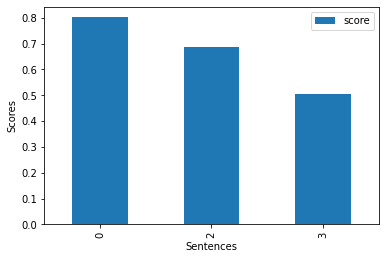

In [161]:
#Average calculation of scores and bar chart plot depicting the analytical score for the relevant sentences

def show_bar_chart(df): 
  analytical_av = df.groupby(['tone_id']).mean(['score'])
  print(analytical_av)

  analytical = df[df['tone_id'].str.contains('analytical')]
  #analytical
  #analytical['score'].plot.bar(x=None, y=None, xlabel = "Sentences", ylabel = "Scores")
  analytical['score'].plot.bar(x=None, y=None, xlabel = "Sentences", ylabel = "Scores").legend(bbox_to_anchor=(1, 1))
  print("\nSentences with an analytical tag:\n0 = Team, I know that times are tough!","\n2 = Product sales have been disappointing for the ...","\n3 = We have a competitive product, but we need to ...")
  print("\nBar chart displaying the analytical score of relevant sentences.")
  #ax.legend(bbox_to_anchor= (1.02, 1));
  #plt.show()

df2 = convert_to_sentence_tones(tone_analysis['sentences_tone'])
show_bar_chart(df2)

### Challenging:  Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data

 ```pd.json_normalize(document_tone)```  

Display the document score for each of the tones in the analysis

In [166]:
#Covered in the Split 2 above: more separating of nested dictionaries and separating levels of document data; just a repetition of the printing can be applied here.
def document_separate(data):
  document_df = convert_to_tones_table(data["tones"])
  document_df2 = document_df.transpose()
  document_final = document_df2[0].apply(pd.Series)
  return document_final
document_final = document_separate(document)

print("\nSplit2: The document tones are: ")
print(document_final)


Split2: The document tones are: 
      score     tone_id   tone_name
0  0.582191     sadness     Sadness
1  0.829888  analytical  Analytical


### Change the text in the text file and analyse the new text.
---

Here is some alternative, **happier text**.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

The sentences of the new text are as follows:<br>
"*But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.*"

### The result of this analysis is below:

```
{'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
```

The new dataframe contains sentences and their tones. There are 2 document tones and 12 sentences. Like the previous dataframe, some of the sentences have more than 1 tone. The same functions will be used to analyse this result and split them into two dataframes on the basis of document and sentences.

In [247]:
#Solution to the problem of creating the sentences dataframe.
#Convert json data to a dataframe with one row for each tone for each sentence.
def convert_to_sentence_tones(data):
    df = pd.json_normalize(data)
    df = df.explode('tones', ignore_index=True)
    df = df.dropna() #need to drop Null rows here so that next lines work
    df['score'] = df['tones'].apply(lambda x: x['score'])
    df['tone_id'] = df['tones'].apply(lambda x: x['tone_id'])
    df['tone_name'] = df['tones'].apply(lambda x: x['tone_name'])
    df = df.drop(['tones'], axis=1)
    #display(df) #called for with the last closing of the function
    return df

# create sentences dataframe, explode first and then drop null above. ## 
# sentences_data = convert_to_sentence_tones(tone_analysis['sentences_tone'])  >> applicable to first dataframe above
# display(sentences_data)

#convert the new text
happy_text = {'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
new_table = convert_to_sentence_tones(happy_text['document_tone'])
display(new_table)

#conversion of the sentence_tone
updated_table = convert_to_sentence_tones(happy_text['sentences_tone'])
display(updated_table)


,score,tone_id,tone_name
0,0.525587,sadness,Sadness
1,0.670614,joy,Joy
2,0.802229,confident,Confident


,sentence_id,text,score,tone_id,tone_name
0,0,But I feel peaceful.,0.511185,joy,Joy
1,0,But I feel peaceful.,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2,Your future is assured.,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
5,3,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
8,6,The leaves will shake loose from the trees and...,0.621679,fear,Fear
9,7,"Christmas will come, and the snows of winter.",0.614764,joy,Joy
10,8,You will live to enjoy the beauty of the froze...,0.930779,joy,Joy
11,9,"Winter will pass, the days will lengthen, the ...",0.654012,sadness,Sadness


###Wordcloud

Adding a wordcloud which helps understanding and determining patterns and evolving trends. In this case the wordcloud visualisation will focus on tones attributed to the sentences on the basis of how frequently they are associated with a sentence (numbers of times a tone tag is repeatd in the respective list).

In [248]:
#Looking into the tone_name column to 
print(updated_table['tone_name'])

0            Joy
1      Tentative
2            Joy
3      Confident
4     Analytical
5      Confident
8           Fear
9            Joy
10           Joy
11       Sadness
12           Joy
13           Joy
14     Confident
Name: tone_name, dtype: object


In [ ]:
!pip install wordcloud

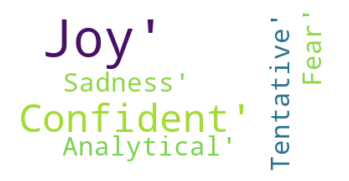

In [252]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Importing Dataset
#df = pd.json_normalize(data) #N/A

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(str(list(updated_table['tone_name']))) 
# the str code is necessary to treat the data imported as string for a wordcloud.
# Converting a dataframe column to a list via <list(df['column'])>, or <df['column'].tolist()>, or as above by adding <list(df['column_name'])>

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

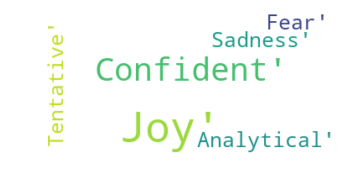

In [253]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(list(updated_table['tone_name'])))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()